# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

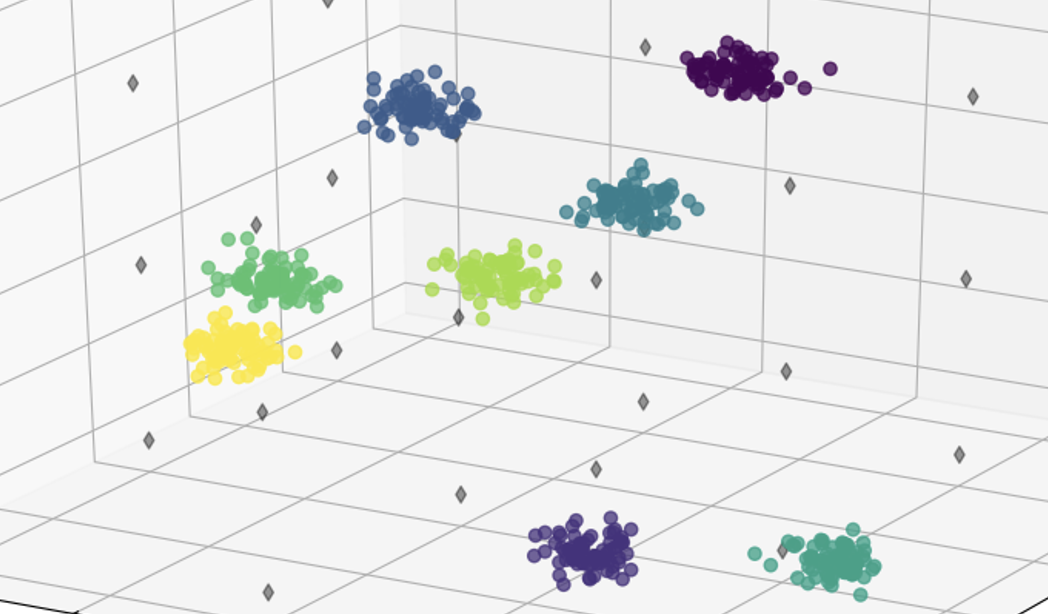

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=1.0, random_state=42)
X += np.random.normal(0, 0.1, size=X.shape)
data = np.column_stack((X, y))
np.savetxt('data.csv', data, delimiter=',', header='x,y,class', comments='')

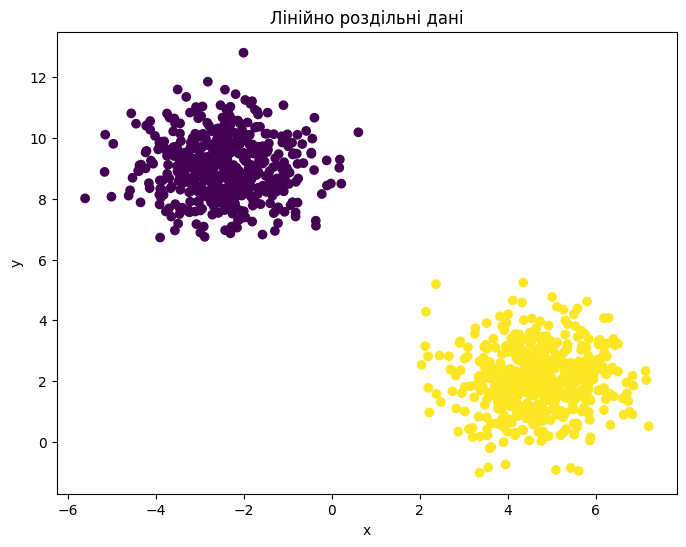

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінійно роздільні дані')
plt.show()

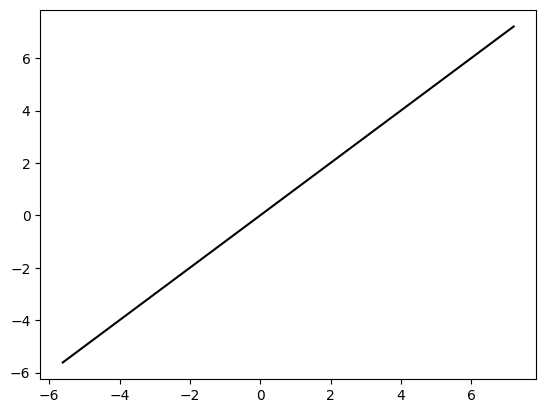

In [4]:
w = np.array([1, -1])  
b = 0 
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
x_range = np.linspace(x_min, x_max, 100)
y_range = (-w[0] * x_range - b) / w[1]
plt.plot(x_range, y_range, 'k-')
plt.show()

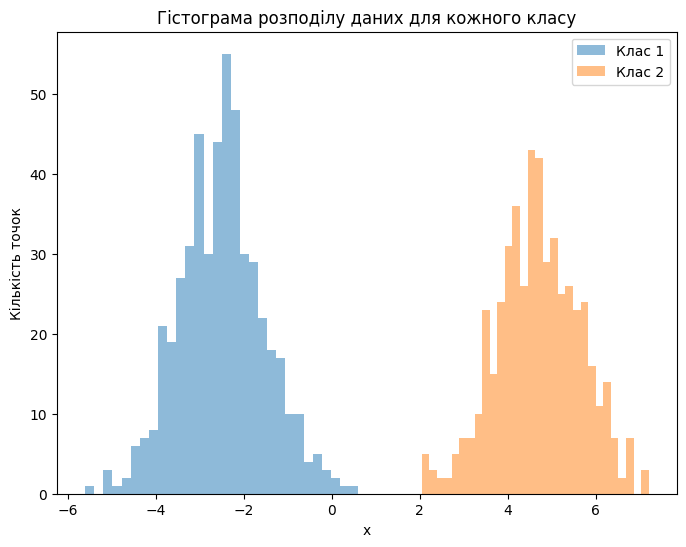

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(X[y == 0, 0], bins=30, alpha=0.5, label='Клас 1')
plt.hist(X[y == 1, 0], bins=30, alpha=0.5, label='Клас 2')
plt.xlabel('x')
plt.ylabel('Кількість точок')
plt.title('Гістограма розподілу даних для кожного класу')
plt.legend()
plt.show()

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

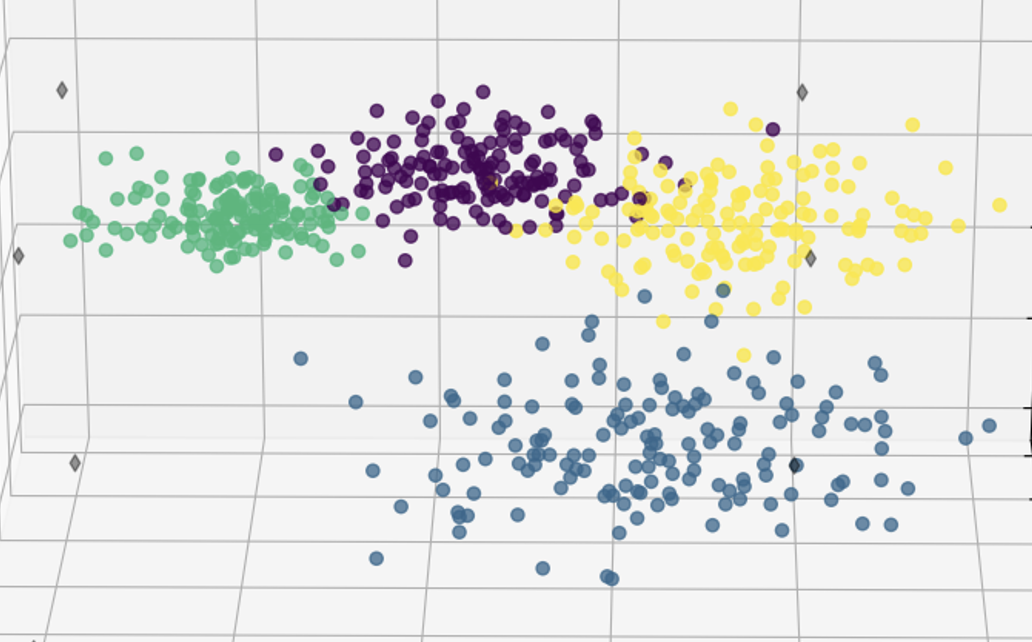

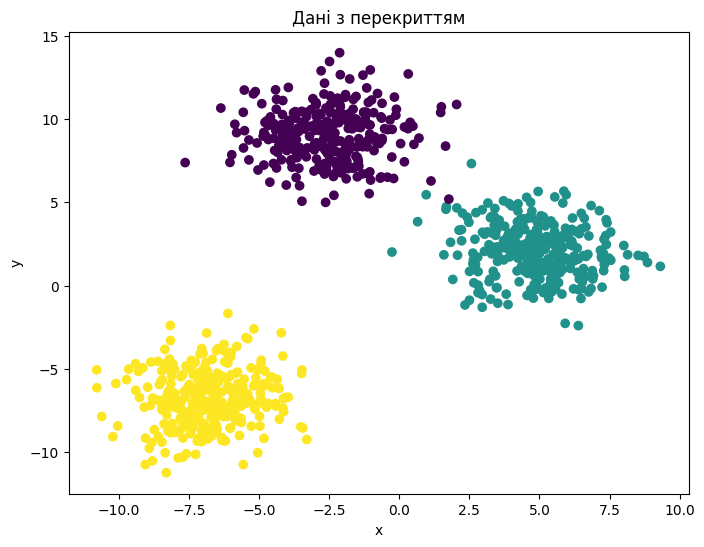

In [6]:
X, y = make_blobs(n_samples=900, centers=3, n_features=2, cluster_std=1.5, random_state=42)
X += np.random.normal(0, 0.5, size=X.shape)
data = np.column_stack((X, y))
np.savetxt('data.csv', data, delimiter=',', header='x,y,class', comments='')
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Дані з перекриттям')
plt.show()

In [7]:
for i in range(3):
    for j in range(i+1, 3):
        overlap = np.sum((y == i) & (y == j))
        print(f'Перекриття між класами {i} і {j}: {overlap}')

Перекриття між класами 0 і 1: 0
Перекриття між класами 0 і 2: 0
Перекриття між класами 1 і 2: 0


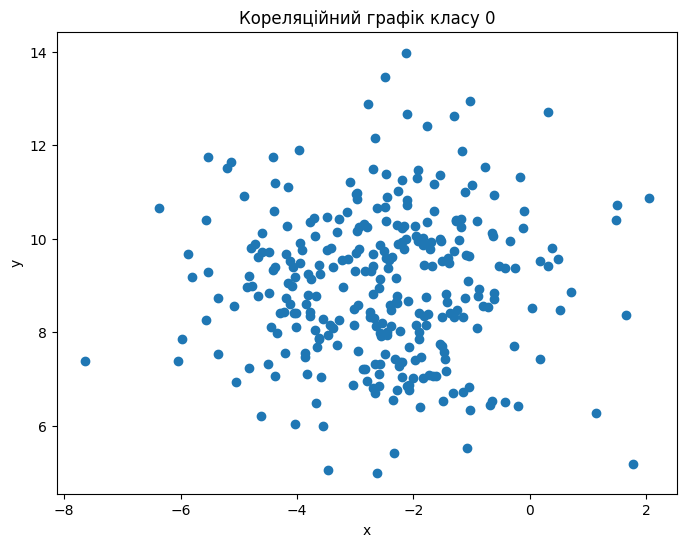

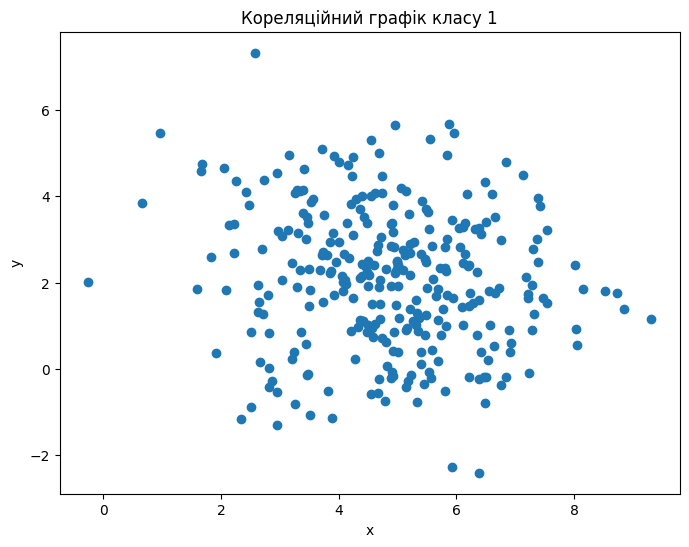

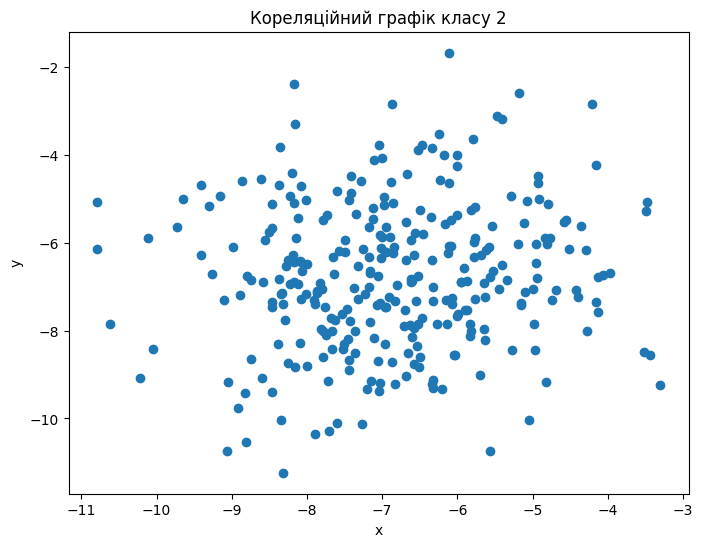

In [8]:
for i in range(3):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == i, 0], X[y == i, 1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Кореляційний графік класу {i}')
    plt.show()

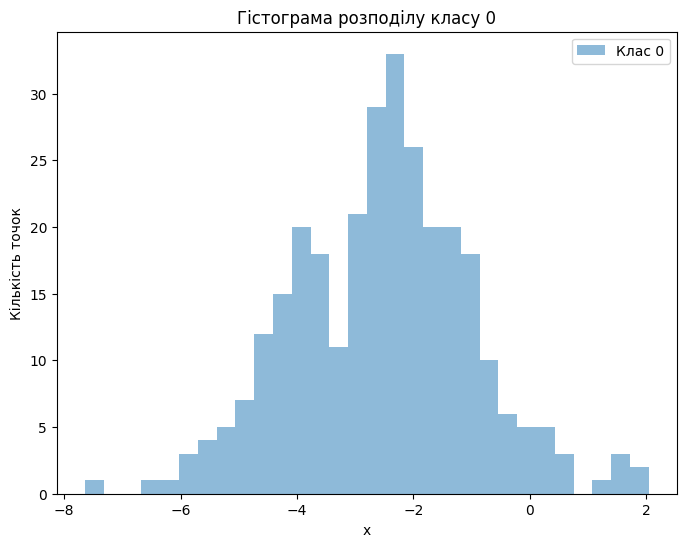

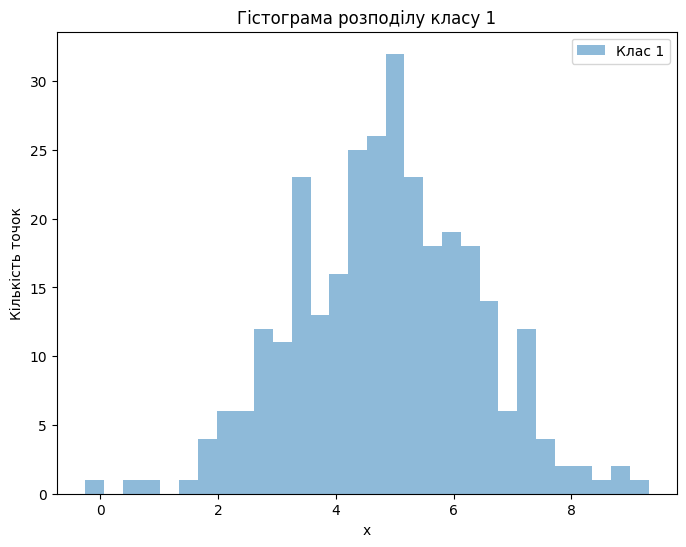

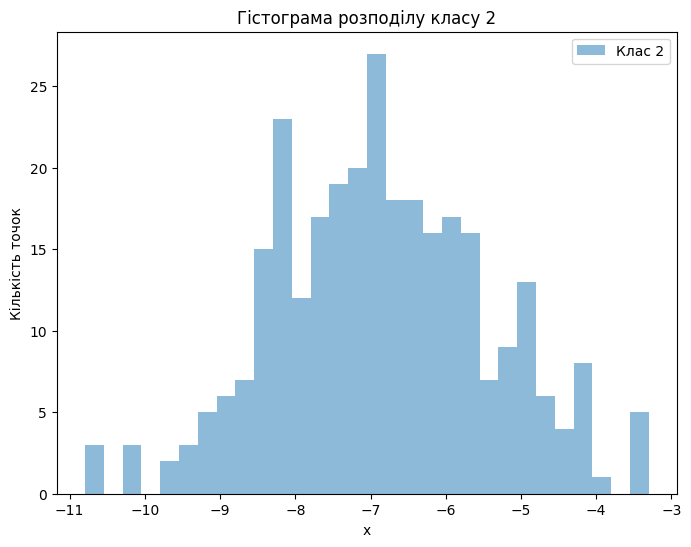

In [9]:
for i in range(3):
    plt.figure(figsize=(8, 6))
    plt.hist(X[y == i, 0], bins=30, alpha=0.5, label=f'Клас {i}')
    plt.xlabel('x')
    plt.ylabel('Кількість точок')
    plt.title(f'Гістограма розподілу класу {i}')
    plt.legend()
    plt.show()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

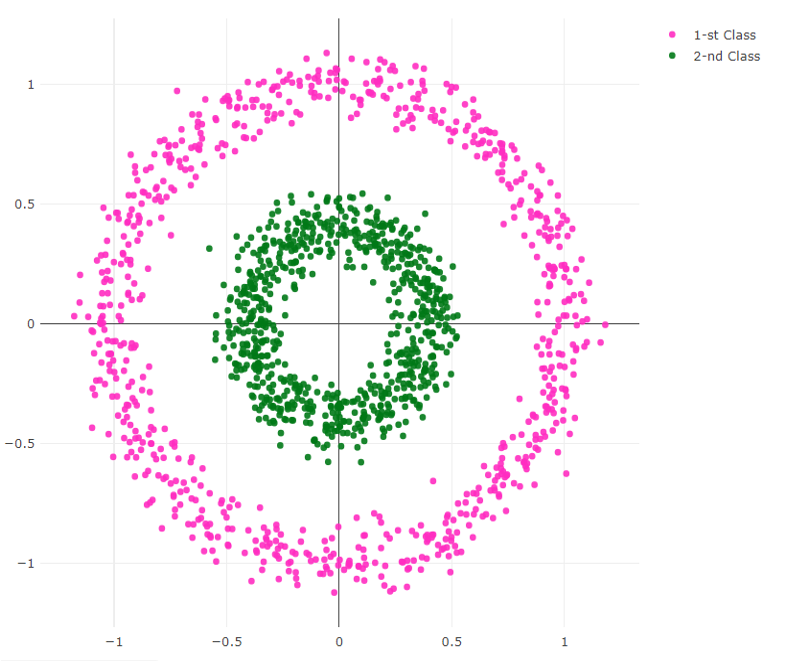

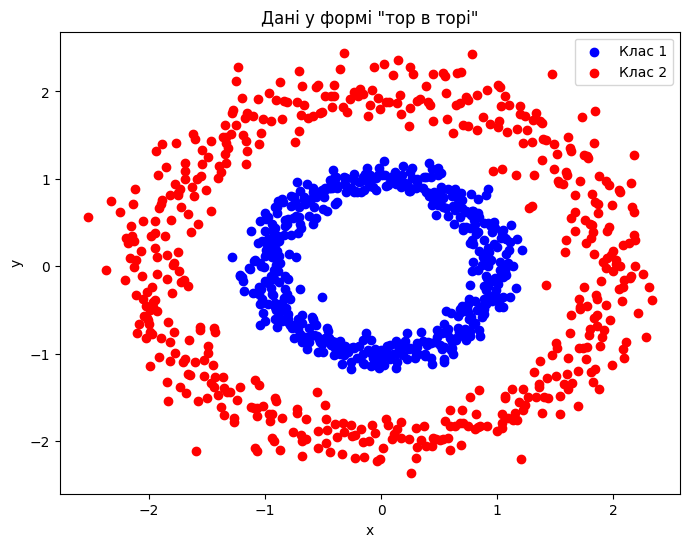

In [10]:
n_points = 500
theta = np.linspace(0, 2*np.pi, n_points)
r = 1 + 0.1*np.random.normal(size=n_points)
x1 = r*np.cos(theta)
y1 = r*np.sin(theta)
n_points = 500
theta = np.linspace(0, 2*np.pi, n_points)
r = 2 + 0.2*np.random.normal(size=n_points)
x2 = r*np.cos(theta)
y2 = r*np.sin(theta)
data = np.column_stack((np.concatenate((x1, x2)), np.concatenate((y1, y2)), np.concatenate((np.zeros(n_points), np.ones(n_points)))))
np.savetxt('data.csv', data, delimiter=',', header='x,y,class', comments='')
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, c='b', label='Клас 1')
plt.scatter(x2, y2, c='r', label='Клас 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Дані у формі "тор в торі"')
plt.legend()
plt.show()

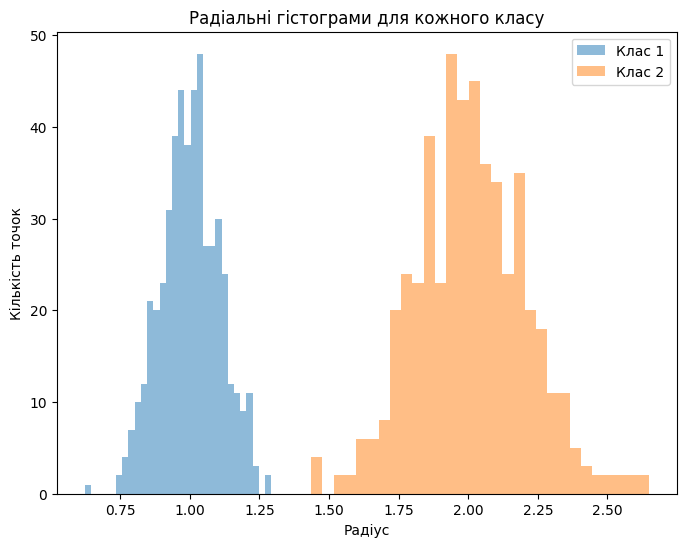

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(np.sqrt(x1**2 + y1**2), bins=30, alpha=0.5, label='Клас 1')
plt.hist(np.sqrt(x2**2 + y2**2), bins=30, alpha=0.5, label='Клас 2')
plt.xlabel('Радіус')
plt.ylabel('Кількість точок')
plt.title('Радіальні гістограми для кожного класу')
plt.legend()
plt.show()

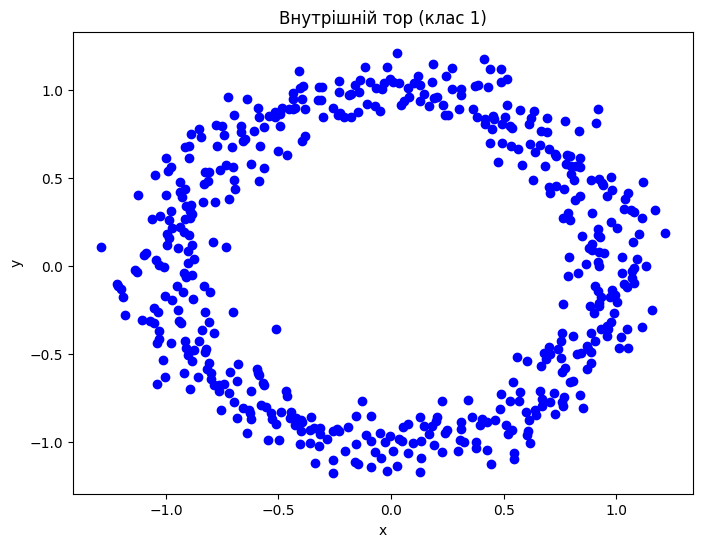

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Внутрішній тор (клас 1)')
plt.show()

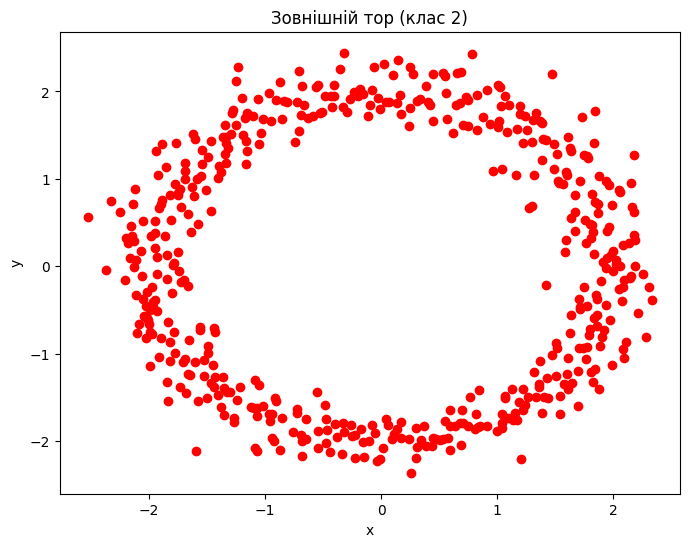

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(x2, y2, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Зовнішній тор (клас 2)')
plt.show()

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

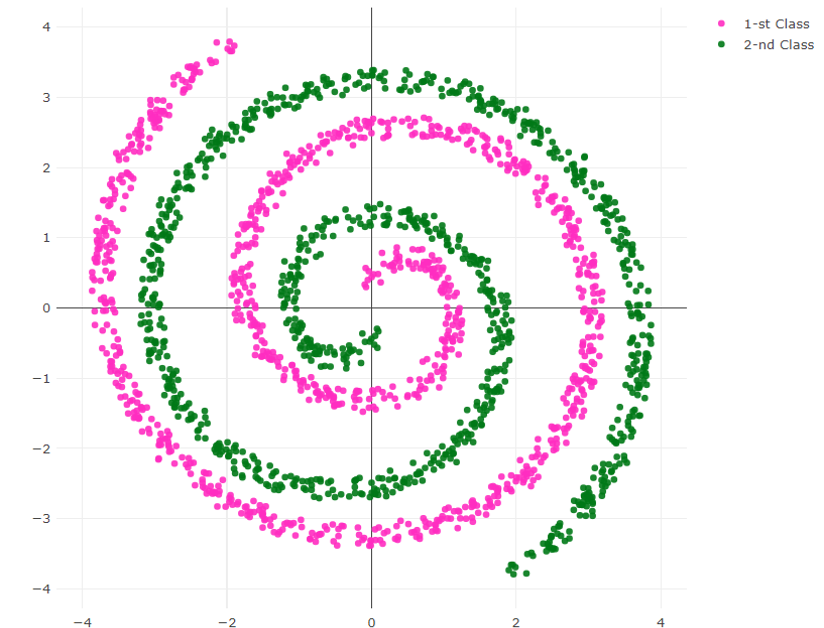

In [14]:
n_points = 500
t = np.linspace(0, 4*np.pi, n_points)
r1 = 1.0
r2 = 1.5
x1 = r1 * np.cos(t)
y1 = r1 * np.sin(t)
x2 = r2 * np.cos(t + np.pi)
y2 = r2 * np.sin(t + np.pi)
x1 += 0.1*np.random.normal(size=n_points)
y1 += 0.1*np.random.normal(size=n_points)
x2 += 0.1*np.random.normal(size=n_points)
y2 += 0.1*np.random.normal(size=n_points)
data = np.column_stack((np.concatenate((x1, x2)), np.concatenate((y1, y2)), np.concatenate((np.zeros(n_points), np.ones(n_points)))))
np.savetxt('data.csv', data, delimiter=',', header='x,y,class', comments='')

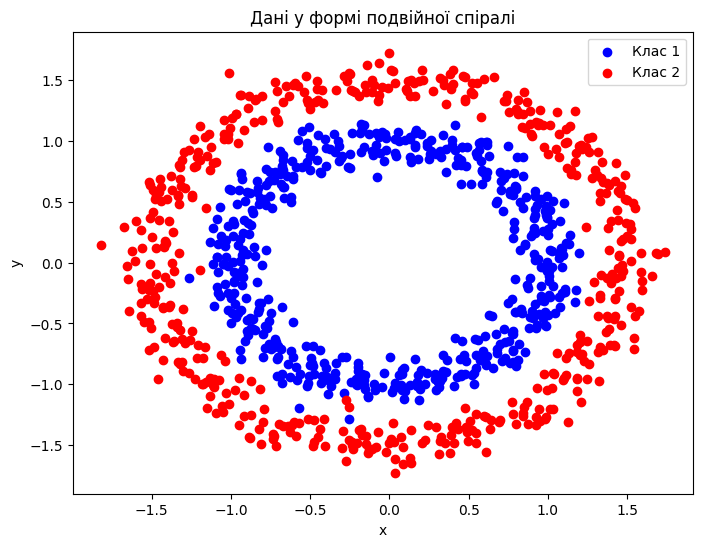

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, c='b', label='Клас 1')
plt.scatter(x2, y2, c='r', label='Клас 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Дані у формі подвійної спіралі')
plt.legend()
plt.show()

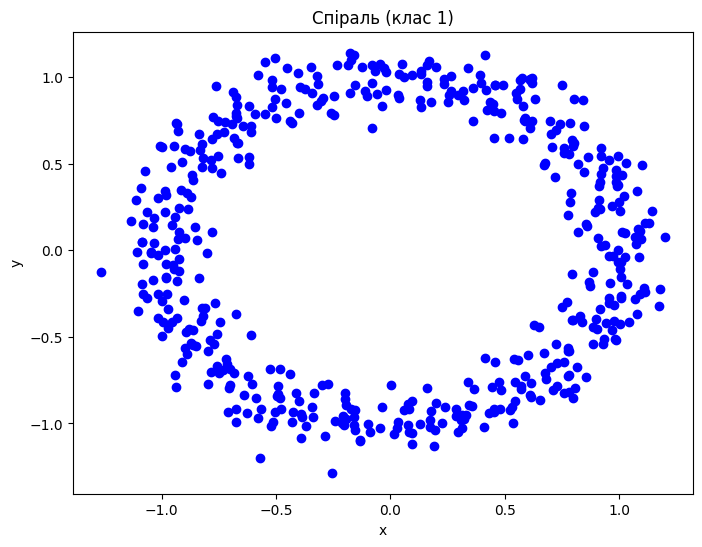

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Спіраль (клас 1)')
plt.show()

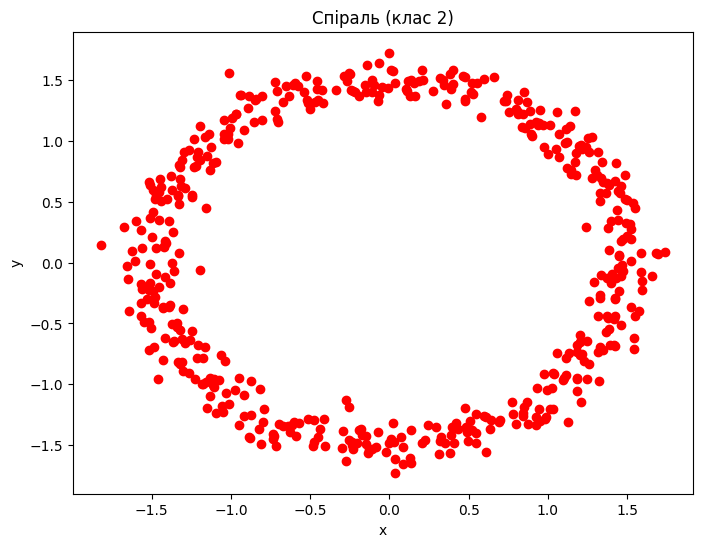

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(x2, y2, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Спіраль (клас 2)')
plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

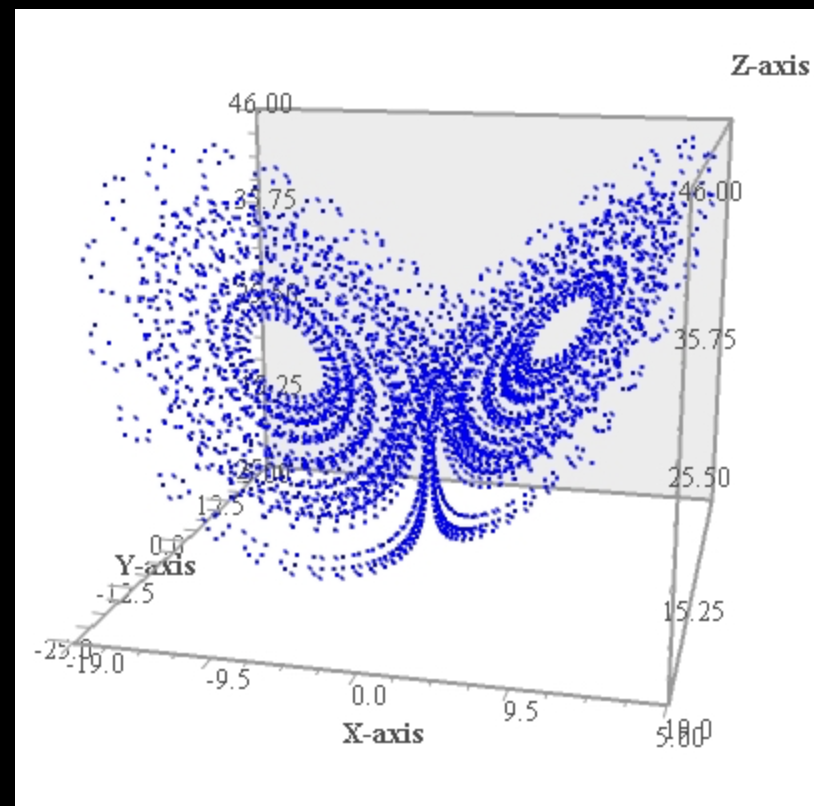

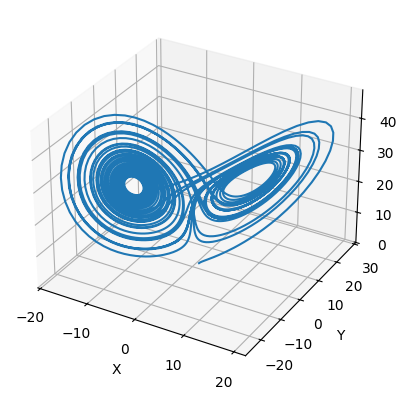

In [18]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return dxdt, dydt, dzdt
sigma = 10.0
rho = 28.0
beta = 8/3.0
state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)
state = odeint(lorenz, state0, t, args=(sigma, rho, beta))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state[:, 0], state[:, 1], state[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

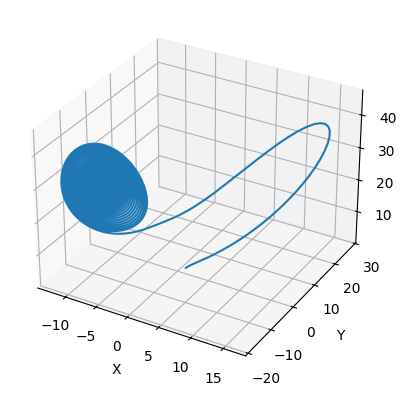

In [19]:
sigma = 5.0
state = odeint(lorenz, state0, t, args=(sigma, rho, beta))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state[:, 0], state[:, 1], state[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

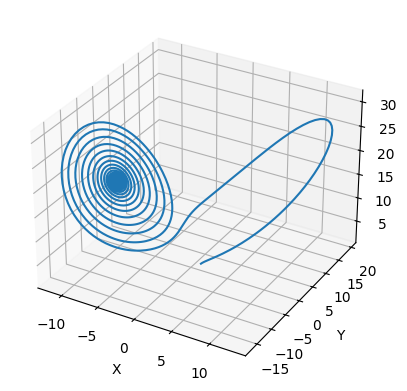

In [20]:
rho = 20.0
state = odeint(lorenz, state0, t, args=(sigma, rho, beta))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state[:, 0], state[:, 1], state[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

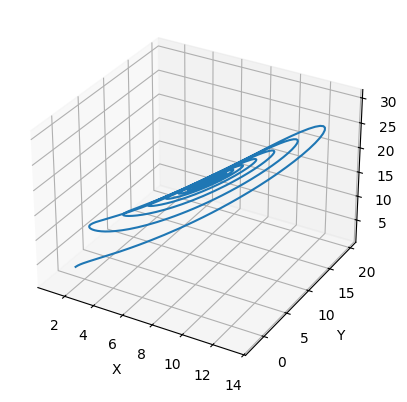

In [21]:
beta = 10/3.0
state = odeint(lorenz, state0, t, args=(sigma, rho, beta))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state[:, 0], state[:, 1], state[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()